# Covariant Linear Fit
+ date: 2017-05-29

## Aim
Minimize $$\sum_i \mathrm{distance}^2(\vec r_i, \mathrm{line})=\sum_i (\vec r_i\cdot \hat n-\rho)^2$$
for line $\vec r\cdot \hat n-\rho=0$. It is equivalent to
+ The principle axis with least moment of inertia
+ The eigenvector with largest eigenval for the covariance matrix

## When is it useful?
Only when fitting geometrical dots, which should be rotational invariant. Ordinary linear fit does not has such an invariance.

For most common case, the $x, y$ has different dimension. As an example, the relation between weight $w$ and height $h$ is not invariant under rotation, because there is no mixture between them. In this condition, we need invariance of scaling for any axis. 

## Code

In [1]:
def clinearfit(lx, ly):
    x, y=mean(lx), mean(ly)
    val, vec=eigh(cov(lx, ly))
    idx = val.argsort()
    vec = vec[:, idx]
    return array([x, y]), vec[1]

In [118]:
def fitline(lx, ly, extend=0.1):
    center, direct=clinearfit(lx, ly)
    assert(direct[0])
    k=direct[1]/direct[0]
    dr=transpose(vstack([lx, ly]))-center
    ds=dot(dr, direct)
    def f(x):return k*(x-center[0])+center[1]
    x=sort(array([max(ds), min(ds)])*direct[0])+center[0]
    d=x[1]-x[0]
    x[0]-=extend*d
    x[1]+=extend*d
    return f, x

## Probabilistic
The likelihood is ?

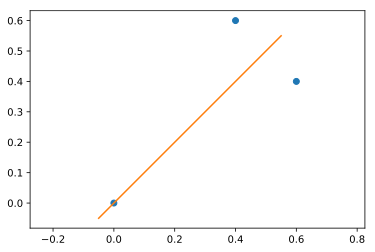

In [126]:
lx=[0,0.6,0.4]
ly=[0,0.4,0.6]
f, x=fitline(lx, ly)
plot(lx, ly, 'o')
axis('equal')
plot(x, f(x));